# 二、收集数据和预处理

In [114]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('data.csv') #载入数据
df_sales.head() #显示头几行数据 

订单号     产品码           消费日期           产品说明  数量     单价    用户码  城市
0  536374   21258  6/1/2020 9:09        五彩玫瑰五支装  32  10.95  15100  北京
1  536376   22114  6/1/2020 9:32       茉莉花白色25枝  48   3.45  15291  上海
2  536376   21733  6/1/2020 9:32  教师节向日葵3枝尤加利5枝  64   2.55  15291  上海
3  536378   22386  6/1/2020 9:37       百合粉色10花苞  10   1.95  14688  北京
4  536378  85099C  6/1/2020 9:37       橙黄香槟色康乃馨  10   1.95  14688  北京

## 2.1 收集数据

In [115]:
print('日期范围（格式转化前）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转换日期格式
print('日期范围（格式转化后）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))#显示日期范围

日期范围（格式转化前）: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围（格式转化后）: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [116]:
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01'] #只保留整月数据
print('日期范围（删除不完整的月份）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围

日期范围（删除不完整的月份）: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


## 2.2 数据可视化

消费日期
2020-06-30    398
2020-07-31    252
2020-08-31    271
2020-09-30    337
2020-10-31    272
Freq: M, Name: 订单号, dtype: int64


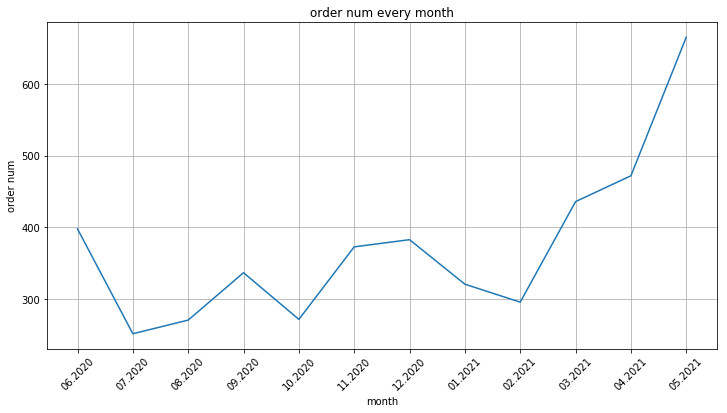

In [117]:
import matplotlib.pyplot as plt
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique() # 计算每个月的订单数量
print(df_orders_monthly.head())

ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('month')
ax.set_ylabel('order num')
ax.set_title('order num every month')

plt.xticks(range(len(df_orders_monthly.index)),
            [x.strftime('%m.%Y') for x in df_orders_monthly.index],
            rotation=45)
plt.show()

## 2.3 数据清洗

In [118]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行
# df_sales = df_sales.loc[df_sales['数量'] > 0]

## 2.4 特征工程

In [119]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据  

订单号     产品码                消费日期           产品说明  数量     单价    用户码  城市  \
0  536374   21258 2020-06-01 09:09:00        五彩玫瑰五支装  32  10.95  15100  北京   
1  536376   22114 2020-06-01 09:32:00       茉莉花白色25枝  48   3.45  15291  上海   
2  536376   21733 2020-06-01 09:32:00  教师节向日葵3枝尤加利5枝  64   2.55  15291  上海   
3  536378   22386 2020-06-01 09:37:00       百合粉色10花苞  10   1.95  14688  北京   
4  536378  85099C 2020-06-01 09:37:00       橙黄香槟色康乃馨  10   1.95  14688  北京   

      总价  
0  350.4  
1  165.6  
2  163.2  
3   19.5  
4   19.5

## 2.5 构建特征集和标签集

构建特征

In [120]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引
df_sales_3m.head()

订单号     产品码                消费日期           产品说明  数量     单价    用户码  城市  \
0  536374   21258 2020-06-01 09:09:00        五彩玫瑰五支装  32  10.95  15100  北京   
1  536376   22114 2020-06-01 09:32:00       茉莉花白色25枝  48   3.45  15291  上海   
2  536376   21733 2020-06-01 09:32:00  教师节向日葵3枝尤加利5枝  64   2.55  15291  上海   
3  536378   22386 2020-06-01 09:37:00       百合粉色10花苞  10   1.95  14688  北京   
4  536378  85099C 2020-06-01 09:37:00       橙黄香槟色康乃馨  10   1.95  14688  北京   

      总价  
0  350.4  
1  165.6  
2  163.2  
3   19.5  
4   19.5

In [121]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user.columns = ['用户码'] #设定字段名
df_user.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user = pd.merge(df_user, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user = pd.merge(df_user, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user.head()

用户码  R值   F值        M值
0  15100  45    6    635.10
1  15291  35   35   1329.95
2  14688   6   85   1472.28
3  15311   5  715  12711.66
4  15862  89   64    354.23

构建标签

In [122]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据

用户码    年度LTV
0  14681   498.95
1  14682    52.00
2  14684  1201.51
3  14687   628.38
4  14688  4449.48

In [123]:
df_LTV = pd.merge(df_user, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV.head() #显示df_LTV

用户码  R值   F值        M值     年度LTV
0  15100  45    6    635.10    635.10
1  15291  35   35   1329.95   4596.51
2  14688   6   85   1472.28   4449.48
3  15311   5  715  12711.66  58218.04
4  15862  89   64    354.23    659.73

创建特征集和标签集

In [124]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

R值   F值        M值
0  45    6    635.10
1  35   35   1329.95
2   6   85   1472.28
3   5  715  12711.66
4  89   64    354.23

In [125]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

## 2.6 拆分训练集、验证集和测试集

In [126]:
from sklearn.model_selection import train_test_split
# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 36)
# 再把其它集拆分成验证集和测试集 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 36)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# 三、选择算法创建模型

In [127]:
from sklearn.linear_model import LinearRegression #导入线性回归模型
from sklearn.tree import DecisionTreeRegressor #导入决策树回归模型
from sklearn.ensemble import RandomForestRegressor #导入随机森林回归模型
model_lr = LinearRegression() #创建线性回归模型
model_dtr = DecisionTreeRegressor() #创建决策树回归模型
model_rfr = RandomForestRegressor() #创建随机森林回归模型

# 四、训练模型

In [128]:
model_lr.fit(X_train, y_train) #拟合线性回归模型
model_dtr.fit(X_train, y_train) #拟合决策树模型
model_rfr.fit(X_train, y_train) #拟合随机森林模型

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# 五、模型的评估与优化

In [129]:
y_valid_preds_lr = model_lr.predict(X_valid) #用线性回归模型预测验证集
y_valid_preds_dtr = model_dtr.predict(X_valid) #用决策树模型预测验证集
y_valid_preds_rfr = model_rfr.predict(X_valid) #用随机森林模型预测验证集

In [130]:
X_valid.iloc[2] #随便选择一个数据

R值       1.00
F值     153.00
M值    1413.83
Name: 163, dtype: float64

In [131]:
print('真值:', y_valid.iloc[2])  #线性回归模型预测值
print('线性回归预测值:', y_valid_preds_lr[2])  #线性回归模型预测值
print('决策树预测值:', y_valid_preds_dtr[2])  #决策树模型预测值
print('随机森林预测值:', y_valid_preds_rfr[2]) #随机森林模型预测值

真值: 4391.9399999999905
线性回归预测值: 7549.22894678151
决策树预测值: 4596.510000000002
随机森林预测值: 6048.145000000002


In [132]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块
print('验证集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('验证集上的R平方分数-决策树: %0.4f' % r2_score(y_valid, model_dtr.predict(X_valid)))
print('验证集上的R平方分数-随机森林: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))

验证集上的R平方分数-线性回归: 0.4333
验证集上的R平方分数-决策树: 0.3401
验证集上的R平方分数-随机森林: 0.6190


绘制预测值和真值的散点图

In [133]:
y_test_preds_rfr = model_lr.predict(X_test) #随机森林模型预测验证集

Text(0.5,1,'实际值 vs. 预测值')

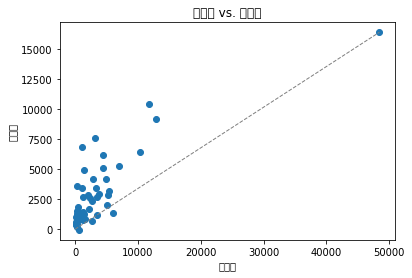

In [134]:
plt.scatter(y_test, y_test_preds_rfr) #预测值和实际值的散点图
plt.plot([0, max(y_test)], [0, max(y_test_preds_rfr)],   color='gray', lw=1, linestyle='--') #绘图
plt.xlabel('实际值') #X轴
plt.ylabel('预测值') #Y轴
plt.title('实际值 vs. 预测值') #标题

绘制模型性能比较图

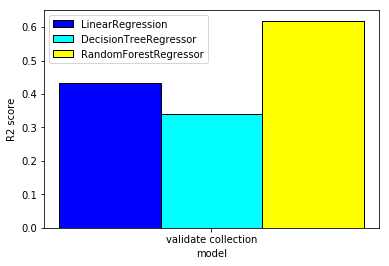

In [145]:
import numpy as np #导入NumPy
  
# fig = plt.figure()
fig, ax = plt.subplots()    

width = 0.25

# bar 的高度
bars1 = [r2_score(y_valid, model_lr.predict(X_valid))]
bars2 = [r2_score(y_valid, model_dtr.predict(X_valid))]
bars3 = [r2_score(y_valid, model_rfr.predict(X_valid))]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='LinearRegression')
 
# Create cyan bars
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='DecisionTreeRegressor')

# Create cyan bars
plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='RandomForestRegressor')

# general layout
plt.xticks([r + width for r in range(len(bars1))], ['validate collection'])
plt.ylabel('R2 score')
plt.xlabel('model')
plt.legend()

plt.show()